In [1]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

import numpy as np
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
BASE_DIR = '/home/saileshg/sailspace/dev/Projects/GitProjects/Self/Learn/DL_With_Py_Chollet/data/cats_dogs_all'
IM_DIMS = (150,150,3)
BATCH_SIZE = 20
EPOCHS = 50
SAMPLE_SIZE = 200

In [3]:
conv_base = VGG16(include_top=False, weights='imagenet', input_shape=IM_DIMS)
# conv_base.summary()

In [4]:
datagenerator = ImageDataGenerator(rescale=1./255)

'''
Fast feature extraction using a pretrained model
The extracted features can be fed to a NeuralNet with Dense layers for classification
Suited for CPU execution - less computationally intensive
'''
def feature_extractor(directory, classifier, generator, target_dims=(150,150), sample_size=200, batch_size=20):
    print(directory)
    features = np.zeros(shape=(sample_size,4,4,512))
    labels = np.zeros(shape=sample_size)
    
    datagen = generator.flow_from_directory(
        directory=directory,
        target_size=target_dims,
        batch_size=batch_size,
        class_mode='binary'
    )

    i = 0
    for input_batch,lbl_batch in datagen:
        
        feat_batch = classifier.predict(input_batch)
        
        features[i*batch_size : (i+1)*batch_size] = feat_batch
        labels[i*batch_size : (i+1)*batch_size] = lbl_batch
        
        i += 1
        
        if i*batch_size >= sample_size: # generators always keep producing data in an infinite loop ; stops post `sample_size`
            break

    return features, labels

In [5]:
feature_dict = {}
for dir_name in ['train', 'validation']:
    
    sub_dir = os.path.join(BASE_DIR,dir_name)
    if os.path.exists(sub_dir):
        # print(sub_dir + " exists!")
        features, labels = feature_extractor(
            directory=sub_dir,
            classifier=conv_base,
            generator=datagenerator,
            sample_size=SAMPLE_SIZE, 
            batch_size=BATCH_SIZE)
        features = np.reshape(features,(SAMPLE_SIZE,4*4*512)) # (4,4,512) is the dim of VGG16 output ; conv_base is VGG16

        feature_dict[dir_name] = (features,labels)

# print(feature_dict.items())

/home/saileshg/sailspace/dev/Projects/GitProjects/Self/Learn/DL_With_Py_Chollet/data/cats_dogs_all/train
Found 2000 images belonging to 2 classes.
/home/saileshg/sailspace/dev/Projects/GitProjects/Self/Learn/DL_With_Py_Chollet/data/cats_dogs_all/validation
Found 1000 images belonging to 2 classes.


In [6]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=4*4*512))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [7]:
X_train, y_train = feature_dict['train']
X_val, y_val = feature_dict['validation']

history = model.fit(
    X_train, y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    validation_data=(X_val, y_val))

Train on 200 samples, validate on 200 samples
Epoch 1/350
200/200 [==============================] - 1s 5ms/step - loss: 1.0335 - acc: 0.6400 - val_loss: 0.3936 - val_acc: 0.8000
Epoch 2/350
200/200 [==============================] - 1s 4ms/step - loss: 0.2172 - acc: 0.8950 - val_loss: 0.4616 - val_acc: 0.7700
Epoch 3/350
200/200 [==============================] - 1s 4ms/step - loss: 0.1180 - acc: 0.9700 - val_loss: 0.3231 - val_acc: 0.8550
Epoch 4/350
200/200 [==============================] - 1s 3ms/step - loss: 0.0559 - acc: 0.9900 - val_loss: 0.2870 - val_acc: 0.8800
Epoch 5/350
200/200 [==============================] - 1s 4ms/step - loss: 0.0260 - acc: 1.0000 - val_loss: 0.2911 - val_acc: 0.8800
Epoch 6/350
200/200 [==============================] - 1s 3ms/step - loss: 0.0202 - acc: 1.0000 - val_loss: 0.3029 - val_acc: 0.8850
Epoch 7/350
200/200 [==============================] - 1s 3ms/step - loss: 0.0159 - acc: 1.0000 - val_loss: 0.3009 - val_acc: 0.8650
Epoch 8/350
200/200 [==

Epoch 61/350
200/200 [==============================] - 1s 3ms/step - loss: 1.1943e-04 - acc: 1.0000 - val_loss: 0.3880 - val_acc: 0.8800
Epoch 62/350
200/200 [==============================] - 1s 3ms/step - loss: 9.4266e-05 - acc: 1.0000 - val_loss: 0.3911 - val_acc: 0.8850
Epoch 63/350
200/200 [==============================] - 1s 3ms/step - loss: 8.5110e-05 - acc: 1.0000 - val_loss: 0.3941 - val_acc: 0.8900
Epoch 64/350
200/200 [==============================] - 1s 4ms/step - loss: 7.9767e-05 - acc: 1.0000 - val_loss: 0.3962 - val_acc: 0.8850
Epoch 65/350
200/200 [==============================] - 1s 3ms/step - loss: 8.3036e-05 - acc: 1.0000 - val_loss: 0.3997 - val_acc: 0.8900
Epoch 66/350
200/200 [==============================] - 1s 3ms/step - loss: 1.2346e-04 - acc: 1.0000 - val_loss: 0.3963 - val_acc: 0.8850
Epoch 67/350
200/200 [==============================] - 1s 3ms/step - loss: 8.8087e-05 - acc: 1.0000 - val_loss: 0.4000 - val_acc: 0.8750
Epoch 68/350
200/200 [============

200/200 [==============================] - 1s 4ms/step - loss: 2.7705e-05 - acc: 1.0000 - val_loss: 0.4340 - val_acc: 0.8800
Epoch 121/350
200/200 [==============================] - 1s 4ms/step - loss: 4.4565e-05 - acc: 1.0000 - val_loss: 0.4355 - val_acc: 0.8800
Epoch 122/350
200/200 [==============================] - 1s 4ms/step - loss: 3.4420e-05 - acc: 1.0000 - val_loss: 0.4358 - val_acc: 0.8750
Epoch 123/350
200/200 [==============================] - 1s 4ms/step - loss: 2.1811e-05 - acc: 1.0000 - val_loss: 0.4372 - val_acc: 0.8800
Epoch 124/350
200/200 [==============================] - 1s 4ms/step - loss: 2.8720e-05 - acc: 1.0000 - val_loss: 0.4376 - val_acc: 0.8800
Epoch 125/350
200/200 [==============================] - 1s 3ms/step - loss: 1.4259e-05 - acc: 1.0000 - val_loss: 0.4385 - val_acc: 0.8800
Epoch 126/350
200/200 [==============================] - 1s 3ms/step - loss: 1.7701e-05 - acc: 1.0000 - val_loss: 0.4400 - val_acc: 0.8850
Epoch 127/350
200/200 [==================

200/200 [==============================] - 1s 3ms/step - loss: 9.1136e-06 - acc: 1.0000 - val_loss: 0.4566 - val_acc: 0.8800
Epoch 180/350
200/200 [==============================] - 1s 3ms/step - loss: 1.4626e-05 - acc: 1.0000 - val_loss: 0.4566 - val_acc: 0.8800
Epoch 181/350
200/200 [==============================] - 1s 3ms/step - loss: 1.2258e-05 - acc: 1.0000 - val_loss: 0.4570 - val_acc: 0.8800
Epoch 182/350
200/200 [==============================] - 1s 3ms/step - loss: 7.2899e-06 - acc: 1.0000 - val_loss: 0.4574 - val_acc: 0.8800
Epoch 183/350
200/200 [==============================] - 1s 4ms/step - loss: 1.3164e-05 - acc: 1.0000 - val_loss: 0.4577 - val_acc: 0.8800
Epoch 184/350
200/200 [==============================] - 1s 3ms/step - loss: 1.0918e-05 - acc: 1.0000 - val_loss: 0.4581 - val_acc: 0.8800
Epoch 185/350
200/200 [==============================] - 1s 3ms/step - loss: 1.4440e-05 - acc: 1.0000 - val_loss: 0.4586 - val_acc: 0.8800
Epoch 186/350
200/200 [==================

200/200 [==============================] - 0s 2ms/step - loss: 1.9832e-05 - acc: 1.0000 - val_loss: 0.4977 - val_acc: 0.8600
Epoch 239/350
200/200 [==============================] - 0s 2ms/step - loss: 7.6408e-06 - acc: 1.0000 - val_loss: 0.4975 - val_acc: 0.8650
Epoch 240/350
200/200 [==============================] - 0s 2ms/step - loss: 5.3922e-06 - acc: 1.0000 - val_loss: 0.4899 - val_acc: 0.8700
Epoch 241/350
200/200 [==============================] - 1s 4ms/step - loss: 4.3062e-06 - acc: 1.0000 - val_loss: 0.4861 - val_acc: 0.8750
Epoch 242/350
200/200 [==============================] - 0s 2ms/step - loss: 8.8320e-06 - acc: 1.0000 - val_loss: 0.4880 - val_acc: 0.8700
Epoch 243/350
200/200 [==============================] - 1s 3ms/step - loss: 3.1237e-06 - acc: 1.0000 - val_loss: 0.4889 - val_acc: 0.8700
Epoch 244/350
200/200 [==============================] - 1s 3ms/step - loss: 8.8988e-06 - acc: 1.0000 - val_loss: 0.4894 - val_acc: 0.8700
Epoch 245/350
200/200 [==================

200/200 [==============================] - 1s 3ms/step - loss: 8.9088e-06 - acc: 1.0000 - val_loss: 0.5261 - val_acc: 0.8600
Epoch 298/350
200/200 [==============================] - 1s 3ms/step - loss: 6.4498e-06 - acc: 1.0000 - val_loss: 0.5294 - val_acc: 0.8650
Epoch 299/350
200/200 [==============================] - 1s 3ms/step - loss: 9.8784e-06 - acc: 1.0000 - val_loss: 0.5116 - val_acc: 0.8500
Epoch 300/350
200/200 [==============================] - 0s 2ms/step - loss: 8.5305e-06 - acc: 1.0000 - val_loss: 0.5055 - val_acc: 0.8750
Epoch 301/350
200/200 [==============================] - 0s 2ms/step - loss: 6.5030e-06 - acc: 1.0000 - val_loss: 0.5011 - val_acc: 0.8750
Epoch 302/350
200/200 [==============================] - 0s 2ms/step - loss: 4.2479e-06 - acc: 1.0000 - val_loss: 0.5002 - val_acc: 0.8750
Epoch 303/350
200/200 [==============================] - 0s 2ms/step - loss: 4.4966e-06 - acc: 1.0000 - val_loss: 0.5000 - val_acc: 0.8800
Epoch 304/350
200/200 [==================

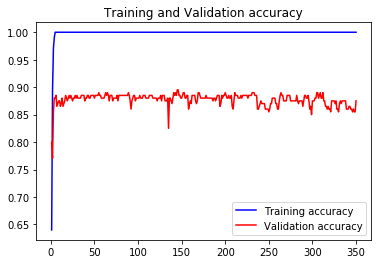

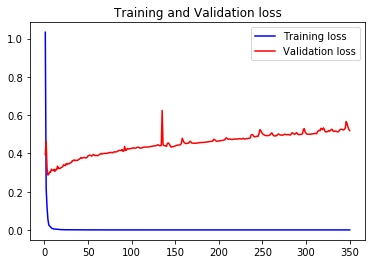

In [8]:
# Plot Training/Validation accuracy

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy)+1)

plt.plot(epochs,accuracy,'b',label='Training accuracy')
plt.plot(epochs,val_accuracy,'r',label='Validation accuracy')
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title("Training and Validation loss")
plt.legend()